# VADER vs Human Sentiment 

In [201]:
# Import the required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

%matplotlib inline

In [202]:
# Function Definitions

def get_pretty_percent(x, y):
    percentage = round(x/y, 3)
    return str(percentage) + '% '

def get_vader_sentiment(analyzer, tweet):
   vader_scores = analyzer.polarity_scores(tweet)
   compound_score = vader_scores['compound']
   return get_single_sentiment(compound_score)

def get_vader_sentiment_remove_pound(analyzer, tweet):
    tweet = tweet.replace('#','')
    vader_scores = analyzer.polarity_scores(tweet)
    compound_score = vader_scores['compound']
    return get_single_sentiment(compound_score)

def get_single_sentiment(compound_score):
    vader_sentiment = 'unknown'
    if (compound_score >= 0.05):
        vader_sentiment = 'positive'
    elif (compound_score < 0.05 and compound_score > -0.05):
        vader_sentiment = 'neutral'
    elif (compound_score <= -0.05):
        vader_sentiment = 'negative'
    return vader_sentiment


In [203]:
tweets = pd.read_csv('../data/prepped_sxsw_tweets.csv')
print(tweets.shape)
tweets.head(3)

(8720, 5)


,id,tweet_text,labeled_brand_or_product,detected_emotion,human_sentiment
0,0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,negative
1,1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,positive
2,2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,positive


Cool....so let's get sentiment from VADER. Use the compound score to label the tweet as Positive/Neutral/Negative. 

The reccommended thresholds from VADER developers/researchers are:
* positive sentiment: compound score >= 0.05
* neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
* negative sentiment: compound score <= -0.05




In [204]:
# Get the VADER sentiments
analyzer = SentimentIntensityAnalyzer()
tweets['vader_sentiment'] = tweets.apply(lambda row: get_vader_sentiment(analyzer, row['tweet_text']), axis=1)
tweets.head()

,id,tweet_text,labeled_brand_or_product,detected_emotion,human_sentiment,vader_sentiment
0,0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,negative,negative
1,1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,positive,positive
2,2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,positive,neutral
3,3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,negative,positive
4,4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,positive,positive


Cool! Let's compare the Human-labeled Sentiment to VADER-labeled Sentiment

In [205]:
by_human = tweets.groupby(['human_sentiment'])['tweet_text'].count()
by_vader = tweets.groupby(['vader_sentiment'])['tweet_text'].count()

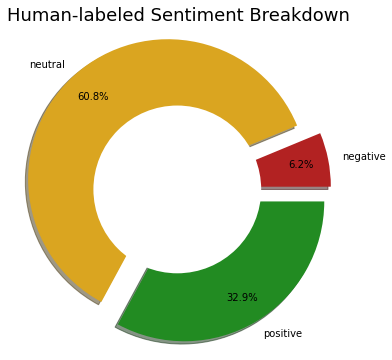

In [206]:

fig2, ax2 = plt.subplots(figsize=(6,6))

my_explode = (0.1, 0.1, 0.1)
my_colors =  ['firebrick','goldenrod', 'forestgreen']
plt.pie(by_human, labels=by_human.index, autopct='%1.1f%%', shadow=True, 
        pctdistance=0.80, explode=my_explode, colors=my_colors)
plt.title('Human-labeled Sentiment Breakdown', size='18')

#draw circle and convert pie chart to Donut Chart
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig2 = plt.gcf()
fig2.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax2.axis('equal')  


plt.show()

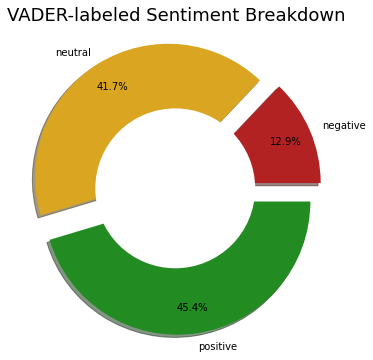

In [207]:
fig2, ax2 = plt.subplots(figsize=(6,6))

my_explode = (0.1, 0.1, 0.1)
my_colors = ['firebrick','goldenrod', 'forestgreen']
plt.pie(by_vader, labels=by_vader.index, autopct='%1.1f%%', shadow=True, 
        pctdistance=0.80, explode=my_explode, colors=my_colors)
plt.title('VADER-labeled Sentiment Breakdown', size='18')

#draw circle and convert pie chart to Donut Chart
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig2 = plt.gcf()
fig2.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax2.axis('equal')  
plt.show()

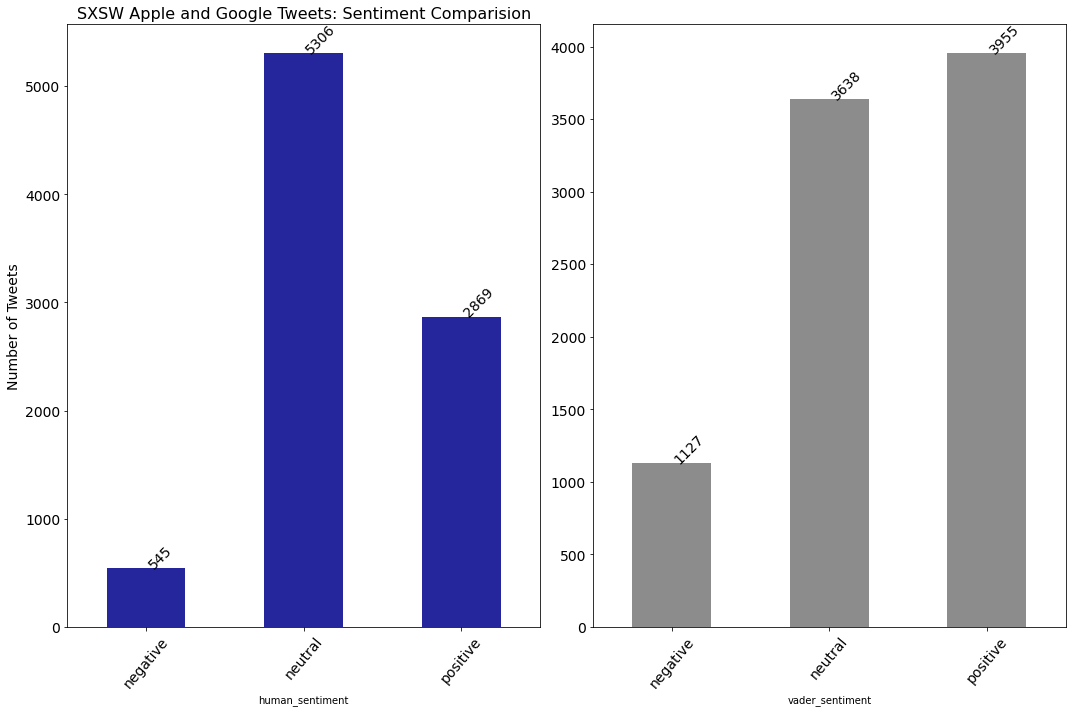

In [208]:
plt.subplot(1, 2, 1)
h_labels = by_human.values
plt.title('SXSW Apple and Google Tweets: Sentiment Comparision', size='16')
by_human.plot.bar(fontsize=14, rot=50, alpha=0.85, figsize=(15,10), color='darkblue')
plt.ylabel('Number of Tweets',size=14)
for i in range(3):
    plt.text(x=i, y=h_labels[i], s=h_labels[i], size=14, rotation=45, color='black')

plt.subplot(1, 2, 2)
v_labels = by_vader.values
by_vader.plot.bar(fontsize=14, rot=50, alpha=0.9, figsize=(15,10), color='gray')
for i in range(3):
    plt.text(x=i, y=v_labels[i], s=v_labels[i], size=14, rotation=45, color='black')

plt.yticks(size=14)
plt.tight_layout()
plt.show()

WOW, there is a difference!


In [209]:
sentiment_diff = tweets[tweets['human_sentiment'] != tweets['vader_sentiment']]
print(sentiment_diff.shape, tweets.shape)

(4101, 6) (8720, 6)


47% (4096 of 8698 tweets) had a difference between the Human-label and VADER sentiments.

The dataset provider mentions that the human-labeled sentiment "directed at" a brand or product. This may account for the difference. 

Let's try this with another, similiar dataset.

In [210]:
apple_tweets = pd.read_csv('../data/prepped_apple_tweets.csv')
print(apple_tweets.shape)
apple_tweets.head(2)

(1630, 4)


,id,text,sentiment,human_sentiment
0,0,Wow. Yall needa step it up @Apple RT @heynyla:...,-1,negative
1,1,What Happened To Apple Inc? http://t.co/FJEX...,0,neutral


In [211]:
# Get the VADER sentiments
analyzer = SentimentIntensityAnalyzer()
apple_tweets['vader_sentiment'] = apple_tweets.apply(lambda row: get_vader_sentiment(analyzer, row['text']), axis=1)
apple_tweets.head(2)

,id,text,sentiment,human_sentiment,vader_sentiment
0,0,Wow. Yall needa step it up @Apple RT @heynyla:...,-1,negative,positive
1,1,What Happened To Apple Inc? http://t.co/FJEX...,0,neutral,neutral


In [212]:
apple_by_human = apple_tweets.groupby(['human_sentiment'])['text'].count()
apple_by_vader = apple_tweets.groupby(['vader_sentiment'])['text'].count()

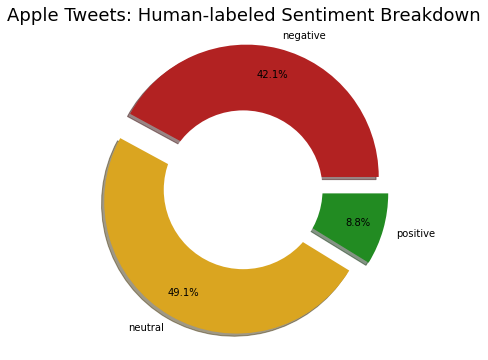

In [213]:
fig2, ax2 = plt.subplots(figsize=(6,6))

my_explode = (0.1, 0.1, 0.1)
my_colors = ['firebrick','goldenrod', 'forestgreen']
plt.pie(apple_by_human, labels=apple_by_human.index, autopct='%1.1f%%', shadow=True, 
        pctdistance=0.80, explode=my_explode, colors=my_colors)
plt.title('Apple Tweets: Human-labeled Sentiment Breakdown', size='18')

#draw circle and convert pie chart to Donut Chart
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig2 = plt.gcf()
fig2.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax2.axis('equal')  
plt.show()

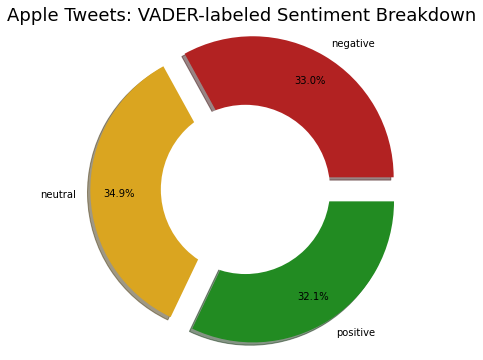

In [214]:
fig2, ax2 = plt.subplots(figsize=(6,6))

my_explode = (0.1, 0.1, 0.1)
my_colors = ['firebrick', 'goldenrod','forestgreen']
plt.pie(apple_by_vader, labels=apple_by_vader.index, autopct='%1.1f%%', shadow=True, 
        pctdistance=0.80, explode=my_explode, colors=my_colors)
plt.title('Apple Tweets: VADER-labeled Sentiment Breakdown', size='18')

#draw circle and convert pie chart to Donut Chart
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig2 = plt.gcf()
fig2.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax2.axis('equal')  
plt.show()

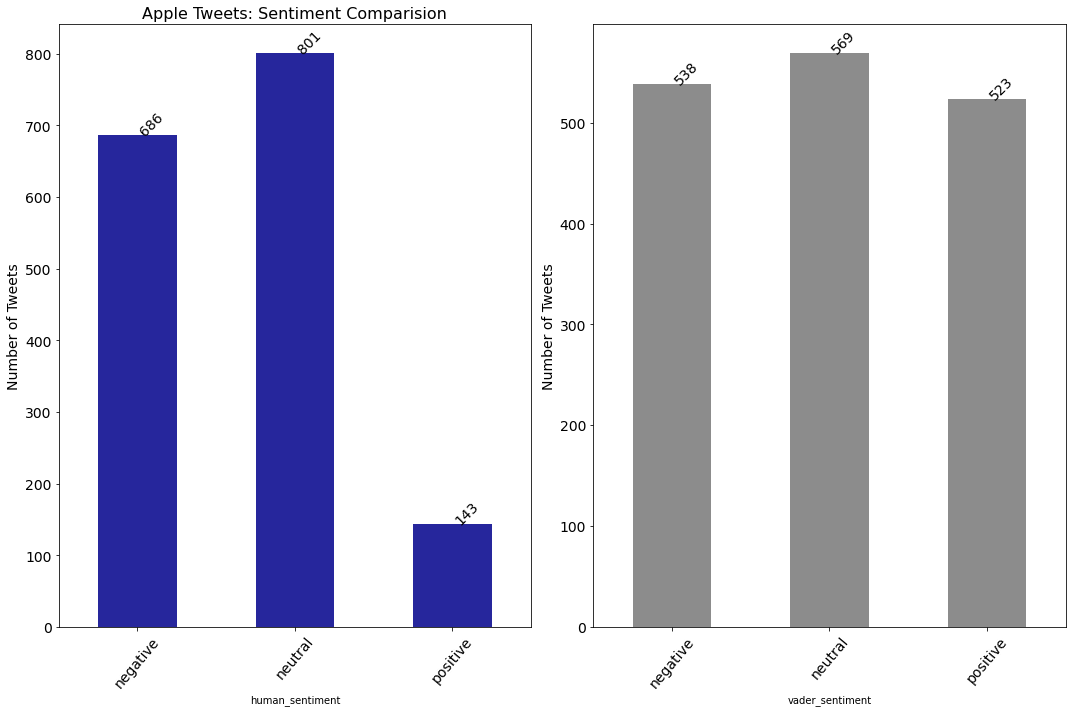

In [215]:
plt.subplot(1, 2, 1)
plt.title('Apple Tweets: Sentiment Comparision', size='16')
apple_by_human.plot.bar(fontsize=14, rot=50, alpha=0.85, figsize=(15,10), color='darkblue')
plt.ylabel('Number of Tweets',size=14)
h_labels = apple_by_human.values
for i in range(3):
    plt.text(x=i, y=h_labels[i], s=h_labels[i], size=14, rotation=45, color='black')
plt.ylabel('Number of Tweets',size=14)

plt.subplot(1, 2, 2)
apple_by_vader.plot.bar(fontsize=14, rot=50, alpha=0.9, figsize=(15,10), color='gray')
v_labels = apple_by_vader.values
for i in range(3):
    plt.text(x=i, y=v_labels[i], s=v_labels[i], size=14, rotation=45, color='black')
plt.ylabel('Number of Tweets',size=14)


plt.yticks(size=14)
plt.tight_layout()
plt.show()

## Observations
### Google and Apple Tweets from SXSW
* Negatives and Positives increased, Neutrals decreased
* VADER labeled some Human-Neutral Tweets as Negatives and Positive 
### Tweets that mention Apple
* Positives increased, Negative and Neutral decreased
* VADER labeled some Human-Neutral and Human-Negative and tweets as Positive



 While these datasets may not be ideally similar, they are somewhat similar (all from Twitter, all either related to Apple or Apple and Google).  We do notice that VADER tended to label Human-Neutral tweets as either Positive or Negative. This may be helpful if you wanted to perform binary classification on Positive or Negative and didn't want to just drop the Neutral tweets.
 



## Conclusions
Human-labels are still the gold-standard. But VADER is certainly useful. Here are two cases.
### CASE 1 - You need sentiment but don't have resources to have humans label your Test/Train data.
 I would certainly use VADER if I you din't have any sentiment labels at all. 
### CASE 2 - You have human labeled Postive, Negative and Neutral text.
I could also make a case for using VADER to try and glean a Positive or Negative sentiment from text labeled by a human as Neutral. Especially when Neutral is an over-represented or dominent class (like the SXSW and Apple Tweets). 

In [216]:
# Save VADER sentiment
tweets.to_csv('../data/sxsw_tweets_with_vader.csv', index_label='id')
apple_tweets.to_csv('../data/apple_tweets_with_vader.csv', index_label='id')